## Exercise 1: Rigid and perspective transformations in homogeneous coordinates

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

4.5.5


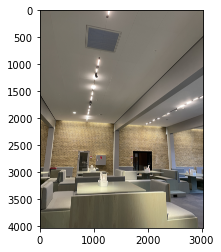

In [2]:
image = cv2.imread("IMG_3282.JPG")
plt.imshow(image)


Cimg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(Cimg)

**OpenCV** stores an image as (blue, green, red) while **Matplotlib** uses the more common (red, green blue).
The channels can be flipped after loading it to make the displayed colors normal.

### Programming exercises: Pinhole camera

- **Exercise 1.11**. First lets make some more 3D points to “photograph”. Create a function that generates a number of 3D points in a recognizable shape. 

In [3]:
def box3d(n):
    comb=[(0.5,0.5),(0.5,-0.5),(-0.5,0.5),(-0.5,-0.5)]
    a=np.linspace(-0.5, 0.5, n)
    box=[0,0,0]

    for j in comb:
        for i in a:
            p=[i,j[0],j[1]]
            box=np.vstack([box, p])

    for j in comb:
        for i in a[1:-1]:
            p=[j[0],i,j[1]]
            box=np.vstack([box, p])

    for j in comb:
        for i in a[1:-1]:
            p=[j[0],j[1],i]
            box=np.vstack([box, p])

    for i in a:
        cross1=[i,0,0]   
        box=np.vstack([box, cross1])
    for i in a:
        cross2=[0,i,0]   
        box=np.vstack([box, cross2])
    for i in a:
        cross3=[0,0,i]   
        box=np.vstack([box, cross3])
      
    box=box[1:]
    

    return box

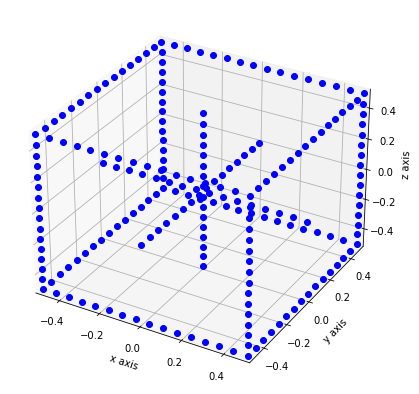

In [4]:
coord=box3d(16)

# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

for point in coord:
    ax.plot(point[0], point[1], point[2], 'bo')

plt.show()

- **Exercise 1.12**. 
Now lets us make our “camera”. Create a function `projectpoints`, that takes as inputs:
    - the camera matrix K
    - the pose of the camera (R, t)
    - a 3 × n matrix (Q), representing n points in 3D to be projected into the camera.

The function should return the projected 2D points as a 2 × n matrix.

In [5]:
def projectpoints(K,Cam,Q):
    #projection matrix P
    P=K@Cam
    
    [m,n]=np.shape(Q)
    cnt=np.ones(m)
    Q_ext=np.column_stack((Q,cnt))
    
    Q_ext=np.transpose(Q_ext)
    
    projection=P@(Q_ext)
    
    qx=np.transpose([projection[0]/projection[2]])
    qy=np.transpose([projection[1]/projection[2]])
    
    project2D=np.column_stack((qx,qy))
    
    project3D=np.transpose(projection)
    
    return project2D, project3D

In [13]:
K=np.array([[1,0,0],[0,1,0],[0,0,1]]) #camera matrix
R=K #pose of the camera, rotation
t=np.transpose([0,0,4]) #pose of the camera, translation
Q=box3d(16) #n points in 3D to be projected into the camera

Cam=np.column_stack((R,t))

points2D,points3D=projectpoints(K,Cam,Q)



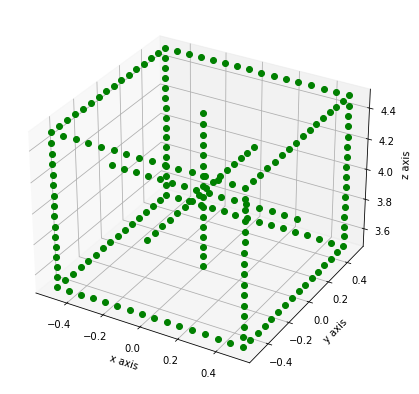

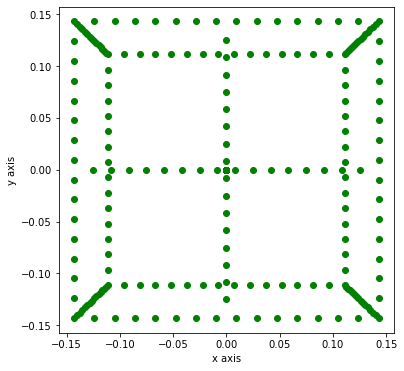

In [14]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

for point in points3D:
    ax.plot(point[0], point[1], point[2], 'go')



# Create a figure, and specify the size  
fig = plt.figure(figsize=(6,6))
# Create axes 
ax = fig.add_subplot()

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

for point in points2D:
    ax.plot(point[0], point[1],'go')

plt.show()


- **Exercise 1.13**. 
Try instead with:

$$ R = \begin{bmatrix} cos(\alpha) & 0 & sin(\alpha) \\ 0 & 1 & 0 \\ -sin(\alpha) & 0 & cos(\alpha) \end{bmatrix}$$
where $\alpha$=30. 

What is the effect?

In [18]:
K=np.array([[1,0,0],[0,1,0],[0,0,1]]) #camera matrix
alpha=30
R=np.array([[np.cos(alpha),0,np.sin(alpha)],[0,1,0],[-np.sin(alpha),0,np.cos(alpha)]]) #pose of the camera, rotation
t=np.transpose([0,0,4]) #pose of the camera, translation
Q=box3d(16) #n points in 3D to be projected into the camera

Cam=np.column_stack((R,t))
print(np.round(K@Cam,3))

points2D,points3D=projectpoints(K,Cam,Q)

[[ 0.154  0.    -0.988  0.   ]
 [ 0.     1.     0.     0.   ]
 [ 0.988  0.     0.154  4.   ]]


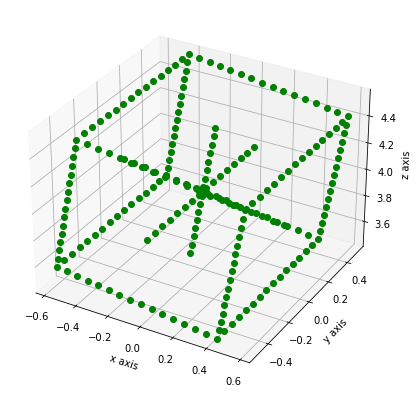

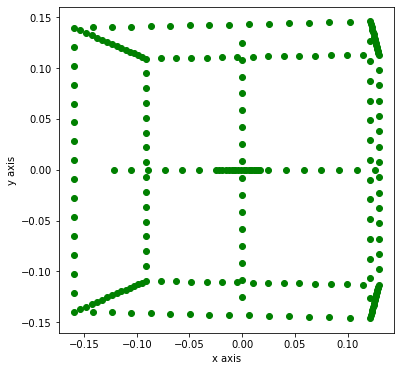

In [19]:
# Create a figure, and specify the size  
fig = plt.figure(figsize=(15,15))
# Create axes 
ax = fig.add_subplot(121, projection='3d')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

for point in points3D:
    ax.plot(point[0], point[1], point[2], 'go')



# Create a figure, and specify the size  
fig = plt.figure(figsize=(6,6))
# Create axes 
ax = fig.add_subplot()

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

for point in points2D:
    ax.plot(point[0], point[1],'go')

plt.show()



- **Exercise 1.14**. 
Play around with changing **R** and **t**.

What is the relationship between the position of the camera and t?

<font color='darkblue'>The internal parameters of the camera are given by K, while R and t are the external parameters. 